In [ ]:
import random,time
import numpy as np
import matplotlib.pyplot as plt
#快速排序
def quickSort(arr, left=None, right=None):
    left = 0 if not isinstance(left,(int, float)) else left
    right = len(arr)-1 if not isinstance(right,(int, float)) else right
    if left < right:
        partitionIndex = partition(arr, left, right)
        quickSort(arr, left, partitionIndex-1)
        quickSort(arr, partitionIndex+1, right)
    return arr
def partition(arr, left, right):
    pivot = left
    index = pivot+1
    i = index
    while  i <= right:
        if arr[i] < arr[pivot]:
            swap(arr, i, index)
            index+=1
        i+=1
    swap(arr,pivot,index-1)
    return index-1
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

#冒泡排序
def bubbleSort(arr):
    for i in range(1, len(arr)):
        for j in range(0, len(arr)-i):
            if arr[j] > arr[j+1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

#选择排序
def pai_xu(list_date):
    for i in range(len(list_date)): 
        Mini_mum = i 
        for j in range(i+1, len(list_date)): 
            if list_date[ Mini_mum] >list_date[j]: 
                 Mini_mum= j

        list_date[i], list_date[Mini_mum] = list_date[Mini_mum], list_date[i] 

#将生成长度为quantity的一组随机数
def test(left,right,quantity):
    text_list=list(random.sample(range(left,right),quantity))
    return text_list
    
#计算排序算法的时间
def timerun(func,text):
    start = time.time()
    func(text)
    end=time.time()
    return(end-start)

#统计算法运行时间。将计算结果x，y保存在数字组里
def time_statistics(func,x):
    timedate=list()
    for i in range(2000,x+1,500):
        textlist=test(1,i+2,i)
        stat=timerun(func,textlist)
        timedate.append([i,stat])
    return np.array(timedate)

#nlon(n)拟合函数，将散点拟合成曲线
def nlogn_fit(ceshi):
    x=ceshi[:,0]
    z1,z2= np.polyfit(x*np.log(x),ceshi[:,1], 1)
    y=z1*(x)*np.log(x)+z2
    return x,y

def nn_fit(ceshi):
    x=ceshi[:,0]
    z= np.polyfit(x,ceshi[:,1], 2)
    y1=np.poly1d(z)
    y=y1(x)
    return x,y


#将排序数据量num，测试函数fun1代入直角坐标系。func2是拟合函数，并对散点进行函数拟合。
def ceshifunction(func1,func2,num):
    ceshi=time_statistics(func1,num)
    plt.scatter(*zip(*ceshi)) 
    x,y=func2(ceshi)
    plt.plot(x,y,color=[1.0,0.0,0.0])
    plt.show()




快速排序


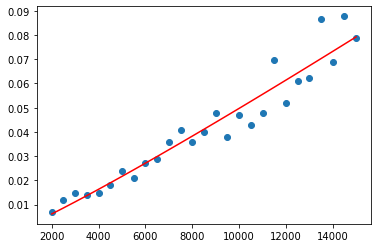

选择排序


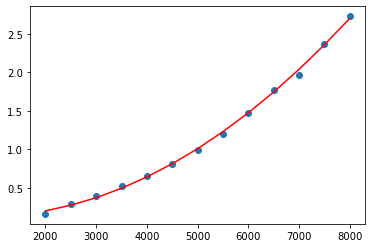

In [37]:
print("快速排序")
ceshifunction(quickSort,nlogn_fit,15000)
print("选择排序")
ceshifunction(pai_xu,nn_fit,8000)
